In [133]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [121]:
### Assign data points to the closets cluster
### Output: a dictionary with cluster id as keys and list of data points belonging to taht cluster as values
def assignCentroids(features, centroids):
    clusters = defaultdict(list)
    for i in range(len(features)):
        ## Frobenius L2 norm
        dist =  [np.linalg.norm(features[i]-mu) for mu in centroids]
        min_idx = dist.index(min(dist))      
        clusters[min_idx].append(i)

    return clusters
        
        
        
    

In [122]:
def computeCentroids(clusters, features):
    new_centroids = []
    keys = sorted(clusters.keys())
    for key in keys:
        data = features[clusters[key]]
        mean = np.mean(data, axis=0)
        new_centroids.append(mean)
        
    return new_centroids

In [170]:
def Hasconverged(data, clusters, centroids):
    #ToDo
    J = 0
    dist = 0
    for k in clusters.keys():
        curr_cluster = centroids[k]
        cluster_points = data[clusters[k]]
        for point in cluster_points:
            dist+=((point-curr_cluster)**2).sum()
    
    J = dist/len(data)
    
    print("Cost after current iteration", J)
    if J <= 0.002:
        return True
    else:
        return False 


In [171]:
def Kmeans(features, k):
    centroids = features[np.random.choice(features.shape[0], size=k, replace=False)]

    max_iter = 50
    curr_iter = 1
    while(curr_iter < max_iter):
        
        clusters = assignCentroids(features, centroids)
        #print(clusters)
        centroids = computeCentroids(clusters, features)
        
        
        curr_iter+=1
        
        
        if Hasconverged(X, clusters, centroids)==True:
            return (centroids, clusters)
        
    return (centroids, clusters)
            
    
    

    
    

In [172]:
## Generate data

# x1 = np.random.randn(5,2) + 5
# x2 = np.random.randn(5,2) - 5
X = np.random.random([100,2])
num_clusters = 2

In [173]:
centroids, clusters = Kmeans(X, num_clusters)

Cost after current iteration 0.11874160985293739
Cost after current iteration 0.10634217407493483
Cost after current iteration 0.10032575741034083
Cost after current iteration 0.09906932127876385
Cost after current iteration 0.09892775408662988
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current iteration 0.09886099334424055
Cost after current i

In [174]:
centroids

[array([0.38644761, 0.76989702]), array([0.57872954, 0.24675068])]

In [175]:
#clusters

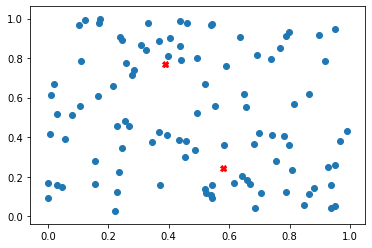

In [177]:
plt.scatter(X[:, 0], X[:,1])
plt.plot(centroids[0][0],centroids[0][1] ,'rX') 
plt.plot(centroids[1][0],centroids[1][1],'rX') 

In [ ]:
## Time complexity O(num_iter * N * k * d)
